In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

%matplotlib inline

from thesis_v2 import dir_dict

from thesis_v2.plots.hal_tuning_analysis import show_scatter_plots

In [2]:
import pandas as pd

In [3]:
f_main_result = join(dir_dict['analyses'], 'tang_refactored', '20200819+20200914', 'hal_tuning_complete.pkl')
df_main_result = pd.read_pickle(f_main_result)

df_main_result = df_main_result[df_main_result.index.get_level_values('rcnn_bl_cls')<=7].sort_index()

In [4]:
df_main_result

hal_tuning_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           1           cm-avg       350                       None   
                                                                                                  700                       None   
                                                                                                  1400                      None   
                                                                                     cm-last      350                       None   
                                                                                                  700                       None   
...                                                                                                                          ...   
softplus True                 poisson   1          6         16          1           legacy       700                       None   
                                                                                                  1400                      None   
                                                             32          1           legacy       350                       None   
                                                                                                  700                       None   
                                                                                                  1400                      None   

                                                                                                             hal_tuning_analysis_half_improved  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                     
relu     False                mse       0          2         8           1           cm-avg       350                                     None   
                                                                                                  700                                     None   
                                                                                                  1400                                    None   
                                                                                     cm-last      350                                     None   
                                                                                                  700                                     None   
...                                                                                                                                        ...   
softplus True                 poisson   1          6         16          1           legacy       700                                     None   
                                                                                                  1400                                    None   
                                                             32          1           legacy       350                                     None   
                                                                                                  700                                     None   
                                                                                                  1400                                    None   

                                                                                                             hal_tuning_analysis_half_improved_baseline  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                              
relu     False                mse       0          2         8           1           cm-avg       350                                              None   
                            

(6912, 2)
overall
baseline mean -0.0088, sem 0.0008
learned mean 0.0154, sem 0.0008
% of pairs, learned > mean 58.97%
cm-avg
baseline mean -0.0116, sem 0.0016
learned mean 0.0094, sem 0.0016
% of pairs, learned > mean 56.89%
cm-last
baseline mean -0.0116, sem 0.0016
learned mean 0.0180, sem 0.0015
% of pairs, learned > mean 62.04%
inst-avg
baseline mean -0.0060, sem 0.0016
learned mean 0.0277, sem 0.0016
% of pairs, learned > mean 63.43%
inst-last
baseline mean -0.0060, sem 0.0016
learned mean 0.0066, sem 0.0017
% of pairs, learned > mean 53.53%


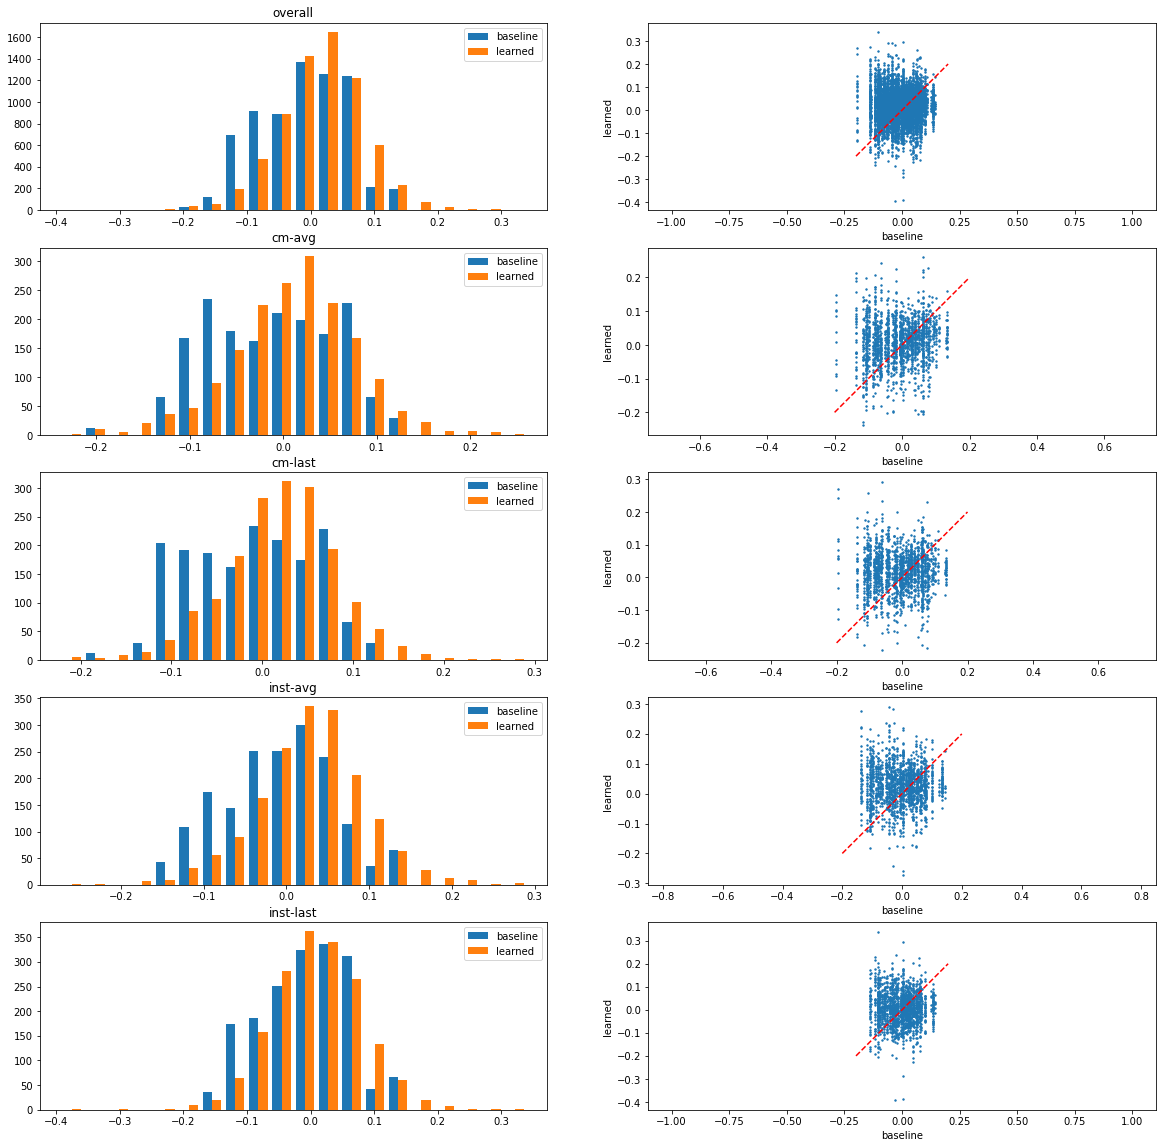

(6912, 2)
overall
baseline mean 0.0061, sem 0.0008
learned mean 0.0136, sem 0.0008
% of pairs, learned > mean 53.57%
cm-avg
baseline mean 0.0042, sem 0.0017
learned mean 0.0080, sem 0.0017
% of pairs, learned > mean 53.76%
cm-last
baseline mean 0.0042, sem 0.0017
learned mean 0.0168, sem 0.0015
% of pairs, learned > mean 57.47%
inst-avg
baseline mean 0.0080, sem 0.0016
learned mean 0.0258, sem 0.0016
% of pairs, learned > mean 57.23%
inst-last
baseline mean 0.0080, sem 0.0016
learned mean 0.0039, sem 0.0017
% of pairs, learned > mean 45.83%


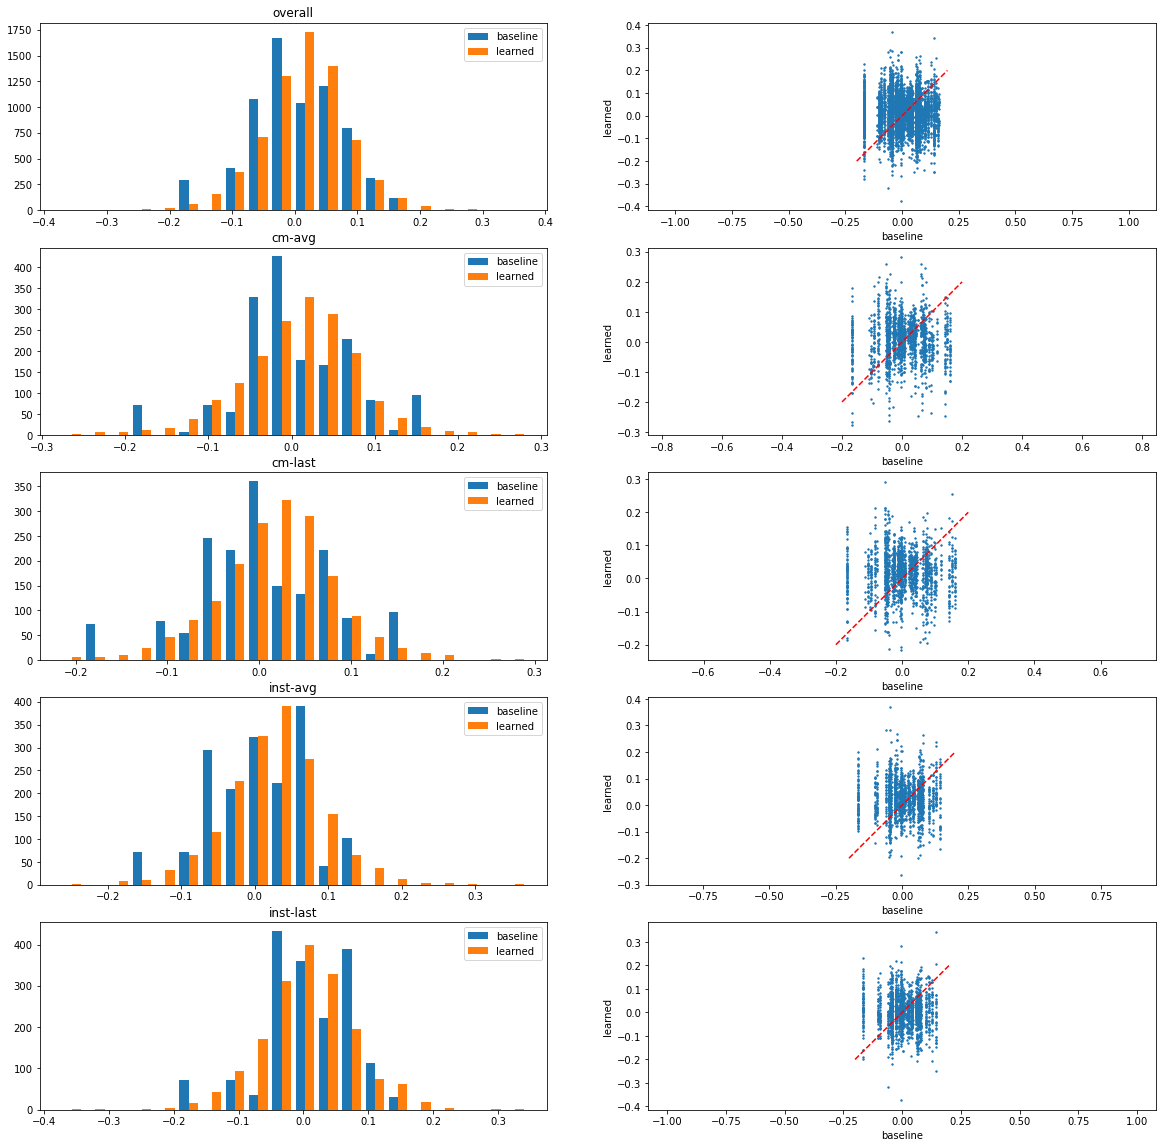

In [5]:
show_scatter_plots(df_main_result)